In [45]:
%matplotlib inline
import scipy
import numpy as np
import itertools
import matplotlib.pyplot as plt

In [46]:
# TODO: Run this cell to generate the data
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

(a) Run the cell in the IPython notebook to generate the data.
Make a scatter plot of the data points showing the true cluster assignment of each point either using different color codes or shape or both.

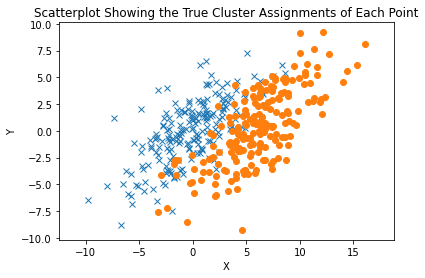

In [47]:
# TODO: Make a scatterplot for the data points showing the true cluster assignments of each point
# plt.plot(...) # first class, x shape
# plt.plot(...) # second class, circle shape

# extract data points with label 0
point_0 = data[labels==0, :]
# extract data points with label 1
point_1 = data[labels==1, :]

# Make a scatterplot for the data points showing the true cluster assignments of each point
plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

(b) Write two functions: km_assignment_step, and km_refitting_step as given in the lecture (Here, km_ means k-means). Identify the correct arguments, and the order to run them. Show the resulting cluster assignments on a scatter plot either using different color codes or shape or both. Also plot the cost vs. the number of iterations. Report your misclassification error.

In [48]:
def cost(data, R, Mu):
    N, D = data.shape
    K = Mu.shape[1]
    J = 0
    for k in range(K):
        J += np.dot(np.linalg.norm(data - np.array([Mu[:, k], ] * N), axis=1)**2, R[:, k])
    return J

In [49]:
# TODO: K-Means Assignment Step
def km_assignment_step(data, Mu):
    """ Compute K-Means assignment step
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        R_new: a NxK matrix of responsibilities
    """
    
    # Fill this in:
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of clusters
    r = np.zeros([N, K])
    for k in range(K):
        # data is a NxD matrix for the data points
        # Dimension for Mu[:, k] is D*1, the dimension for np.expand_dims(Mu[:, k], axis=0) is 1*D
        r[:, k] = np.sum((data - np.expand_dims(Mu[:, k], axis=0))**2, axis=1)  # The dimension is N*1 for k iteration
    
    arg_min = np.argmin(r, axis=1) # argmax/argmin along dimension 1
    R_new = np.zeros([N, K]) # Set to zeros/ones with shape (N, K)
    R_new[np.arange(N), arg_min] = 1 # Assign to 1

    return R_new

In [50]:
# TODO: K-means Refitting Step
def km_refitting_step(data, R, Mu):
    """ Compute K-Means refitting step.
    
    Args:
        data: a NxD matrix for the data points
        R: a NxK matrix of responsibilities
        Mu: a DxK matrix for the cluster means locations
    
    Returns:
        Mu_new: a DxK matrix for the new cluster means locations
    """

    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1]  # number of clusters
    Mu_new = np.dot(data.T, R) / np.sum(R, axis=0)  # dimension is (D*K)
    
    return Mu_new

In [51]:
# TODO: Run this cell to call the K-means algorithm
N, D = data.shape
K = 2
max_iter = 50

Mu = np.zeros([D, K])
Mu[:, 1] = 1.

# calculate the cost of kmeans algorithm
costs = []
for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    c = cost(data, R, Mu)
    costs.append(c)
    print(it, c)
    Mu = km_refitting_step(data, R, Mu)

class_1 = R[:, 0]==1
class_2 = R[:, 1]==1


0 12540.526534984156
1 6143.939624502595
2 6027.139023833695
3 5975.83672144705
4 5971.9901585437665
5 5970.285849386431
6 5970.052408911308
7 5970.052408911308
8 5970.052408911308
9 5970.052408911308
10 5970.052408911308
11 5970.052408911308
12 5970.052408911308
13 5970.052408911308
14 5970.052408911308
15 5970.052408911308
16 5970.052408911308
17 5970.052408911308
18 5970.052408911308
19 5970.052408911308
20 5970.052408911308
21 5970.052408911308
22 5970.052408911308
23 5970.052408911308
24 5970.052408911308
25 5970.052408911308
26 5970.052408911308
27 5970.052408911308
28 5970.052408911308
29 5970.052408911308
30 5970.052408911308
31 5970.052408911308
32 5970.052408911308
33 5970.052408911308
34 5970.052408911308
35 5970.052408911308
36 5970.052408911308
37 5970.052408911308
38 5970.052408911308
39 5970.052408911308
40 5970.052408911308
41 5970.052408911308
42 5970.052408911308
43 5970.052408911308
44 5970.052408911308
45 5970.052408911308
46 5970.052408911308
47 5970.052408911308
4

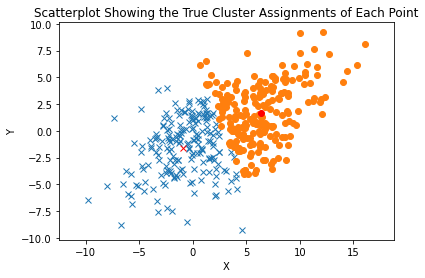

In [52]:
# TODO: Make a scatterplot for the data points showing the K-Means cluster assignments of each point

point_0 = data[class_1, :]
point_1 = data[class_2, :]

plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x')
plt.plot(Mu[0, 0], Mu[1, 0], 'x', color='red') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o')
plt.plot(Mu[0, 1], Mu[1, 1], 'o', color='red') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()


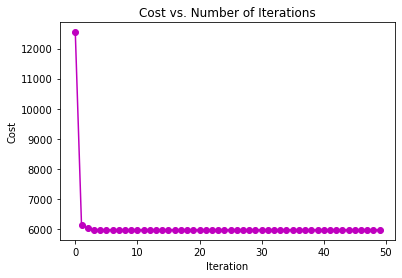

The misclassification error is: 0.213


In [53]:
# plot the cost vs number of iterations
plt.figure()
plt.title('Cost vs. Number of Iterations')
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.plot(np.arange(max_iter), costs, 'mo-')
plt.show()

# calculate the misclassification error
error = 1 - (np.sum(class_1 & (labels==0)) + np.sum(class_2 & (labels==1))) / N
print('The misclassification error is: %.3f'  % error)

(c)Writethreefunctions:log-likelihood, gm_e_step, and gm_m_step as given in the lecture. Identify the correct arguments, and the order to run them.
Run the algorithm until convergence and show the resulting cluster assignments on a scatter plot either using different color codes or shape or both. Also plot the log-likelihood vs. the number of iterations. Report your misclassification error.

In [54]:
def normal_density(x, mu, Sigma):
    return np.exp(-.5 * np.dot(x - mu, np.linalg.solve(Sigma, x - mu))) \
        / np.sqrt(np.linalg.det(2 * np.pi * Sigma))

In [55]:
def log_likelihood(data, Mu, Sigma, Pi):
    """ Compute log likelihood on the data given the Gaussian Mixture Parameters.
    
    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        L: a scalar denoting the log likelihood of the data given the Gaussian Mixture
    """
    # Fill this in:
    N, D = data.shape  # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of mixtures
    L, T = 0., 0.
    for n in range(N):
        T = 0
        for k in range(K):
            # Compute the likelihood from the k-th Gaussian weighted by the mixing coefficients 
            T += Pi[k] * normal_density(data[n], Mu[:, k], Sigma[k])
        L += np.log(T)

    return L

In [56]:
# TODO: Gaussian Mixture Expectation Step
def gm_e_step(data, Mu, Sigma, Pi):
    """ Gaussian Mixture Expectation Step.

    Args:
        data: a NxD matrix for the data points
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    
    Returns:
        Gamma: a NxK matrix of responsibilities 
    """
    # Fill this in:
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Mu.shape[1] # number of mixtures
    Gamma = np.zeros([N, K]) # zeros of shape (N,K), matrix of responsibilities
    
    for n in range(N):
        for k in range(K):
            Gamma[n, k] = Pi[k] * normal_density(data[n], Mu[:, k], Sigma[k]) # pi_k*N
        Gamma[n, :] /= np.sum(Gamma[n, :]) # Normalize by sum across second dimension (mixtures)

    return Gamma

In [57]:
# TODO: Gaussian Mixture Maximization Step
def gm_m_step(data, Gamma):
    """ Gaussian Mixture Maximization Step.

    Args:
        data: a NxD matrix for the data points
        Gamma: a NxK matrix of responsibilities 
    
    Returns:
        Mu: a DxK matrix for the means of the K Gaussian Mixtures
        Sigma: a list of size K with each element being DxD covariance matrix
        Pi: a vector of size K for the mixing coefficients
    """
    # Fill this in:
    N, D = data.shape # Number of datapoints and dimension of datapoint
    K = Gamma.shape[1]  # number of mixtures
    Nk = np.sum(Gamma, axis=0) # Sum along first axis [K]
    Mu = np.zeros([D, K]) #initialize 
    Sigma = np.zeros([K, D, D]) #initialize 

    gamma_data = np.matmul(data.T, Gamma) # dimension for data transpose is DxN, for Gamma is NxK
    for k in range(K):
        Mu[k] = gamma_data[k] / Nk[k] #r*x/N_k
        covariance = np.zeros([D,D]) #initialize
        for n in range(N):
            #r*(x-mu)(x-mu)^T
            covariance += Gamma[n,k] * np.matmul((data[n:n+1] - Mu[:, k:k+1].T).T, (data[n:n+1] - Mu[:, k:k+1].T))
        Sigma[k] = covariance / Nk[k]
    Pi = Nk / N 

    return Mu, Sigma, Pi

In [58]:
# TODO: Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 

max_iter  = 200

log_likelihoods = []
for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    log_likelihoods.append(log_likelihood(data, Mu, Sigma, Pi))

class_1 = Gamma[:, 0] >= .5
class_2 = Gamma[:, 1] >= .5

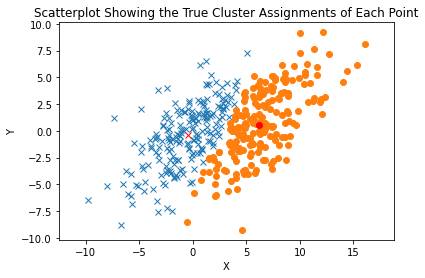

In [59]:
# TODO: Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point

point_0 = data[class_1, :]
point_1 = data[class_2, :]

plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x')
plt.plot(Mu[0, 0], Mu[1, 0], 'x', color='red') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o')
plt.plot(Mu[0, 1], Mu[1, 1], 'o', color='red') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

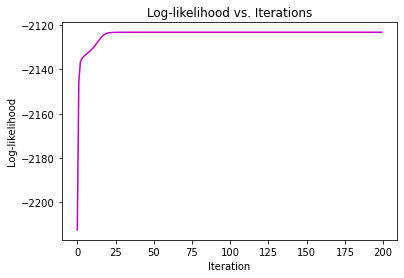

The misclassification error is: 0.108


In [60]:
# plot the log likelihood vs number of iterations
plt.figure()
plt.title('Log-likelihood vs. Iterations')
plt.ylabel('Log-likelihood')
plt.xlabel('Iteration')
plt.plot(np.arange(max_iter), ll, 'm-')
plt.show()

# calculate the misclassification error
error = 1 - (np.sum(class_1 & (labels==0)) + np.sum(class_2 & (labels==1))) / N
print('The misclassification error is: %.3f'  % error)

(d) 

(a) Compare the performance of k-Means and EM based on the resulting cluster assignments.

According to the resulting cluster assignments, the performance of EM is better than the one for k-Means. EM separates the points more similiar to the true labels than k-Means. This is probably because EM uses mixture of gaussian. 

(b)  Compare the performance of k-Means and EM based on their convergence rate. What is the bottleneck for which method?

According to the covergence rate, the performance of k-Means is better than the one for EM. The bottleneck for k-Means is near no.5 iteration, while the one for EM is near no.25 iteration.

(c) Experiment with 5 different data realizations (generate new data), run your algorithms, and summarize your findings. Does the algorithm performance depend on different realizations of data?

After experimenting with 5 different data realizations, we find that according to the resulting cluster assignments, the performance of EM is always better than the one for k-Means. EM separates the points more similiar to the true labels than k-Means. The misclassification error for EM is always smaller than the one for k-Means. According to the covergence rate, the performance of k-Means is always better than the one for EM. The bottleneck for k-Means is always near no.5 iteration, while the one for EM is always near no.25 iteration. Therefore, the algorithm performance may not depend on different realizations of data.

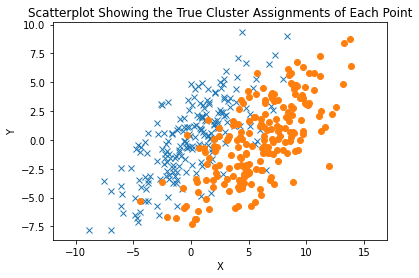

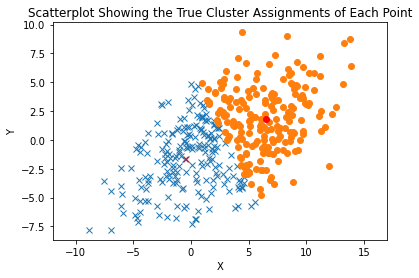

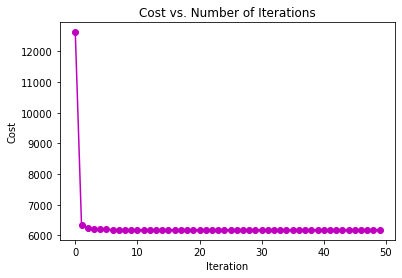

The misclassification error is: 0.265


In [65]:
# TODO: Run this cell to generate the data
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

# TODO: Make a scatterplot for the data points showing the true cluster assignments of each point
# plt.plot(...) # first class, x shape
# plt.plot(...) # second class, circle shape

# extract data points with label 0
point_0 = data[labels==0, :]
# extract data points with label 1
point_1 = data[labels==1, :]

# Make a scatterplot for the data points showing the true cluster assignments of each point
plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# TODO: Run this cell to call the K-means algorithm
N, D = data.shape
K = 2
max_iter = 50

Mu = np.zeros([D, K])
Mu[:, 1] = 1.

# calculate the cost of kmeans algorithm
costs = []
for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    c = cost(data, R, Mu)
    costs.append(c)
    Mu = km_refitting_step(data, R, Mu)

class_1 = R[:, 0]==1
class_2 = R[:, 1]==1

# TODO: Make a scatterplot for the data points showing the K-Means cluster assignments of each point

point_0 = data[class_1, :]
point_1 = data[class_2, :]

plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x')
plt.plot(Mu[0, 0], Mu[1, 0], 'x', color='red') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o')
plt.plot(Mu[0, 1], Mu[1, 1], 'o', color='red') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# plot the cost vs number of iterations
plt.figure()
plt.title('Cost vs. Number of Iterations')
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.plot(np.arange(max_iter), costs, 'mo-')
plt.show()

error = 1 - (np.sum(class_1 & (labels==0)) + np.sum(class_2 & (labels==1))) / N
print('The misclassification error is: %.3f'  % error)

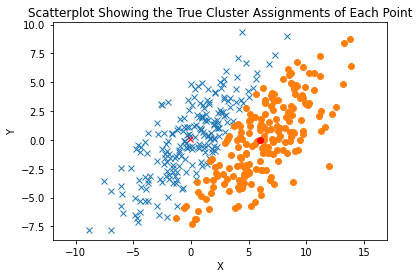

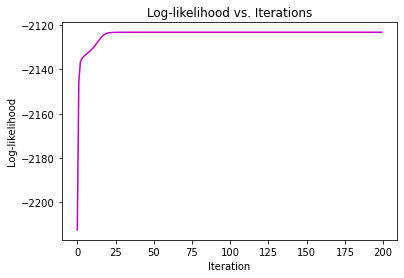

The misclassification error is: 0.113


In [66]:
# TODO: Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 

max_iter  = 200

log_likelihoods = []
for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    log_likelihoods.append(log_likelihood(data, Mu, Sigma, Pi))

class_1 = Gamma[:, 0] >= .5
class_2 = Gamma[:, 1] >= .5

# TODO: Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point

point_0 = data[class_1, :]
point_1 = data[class_2, :]

plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x')
plt.plot(Mu[0, 0], Mu[1, 0], 'x', color='red') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o')
plt.plot(Mu[0, 1], Mu[1, 1], 'o', color='red') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# plot the log likelihood vs number of iterations
plt.figure()
plt.title('Log-likelihood vs. Iterations')
plt.ylabel('Log-likelihood')
plt.xlabel('Iteration')
plt.plot(np.arange(max_iter), ll, 'm-')
plt.show()

error = 1 - (np.sum(class_1 & (labels==0)) + np.sum(class_2 & (labels==1))) / N
print('The misclassification error is: %.3f'  % error)

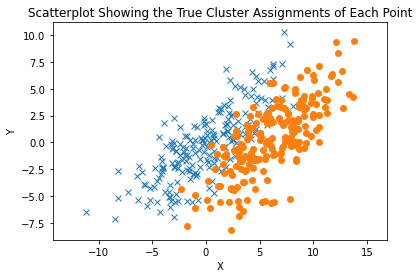

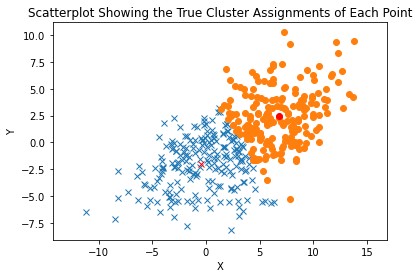

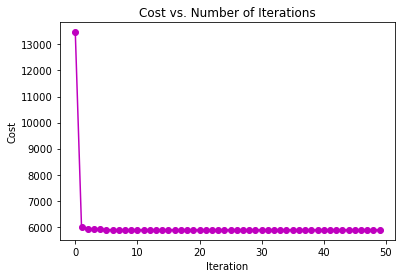

The misclassification error is: 0.277


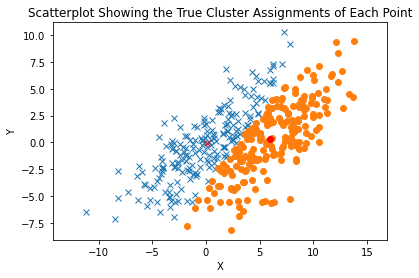

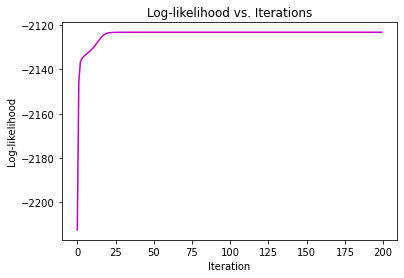

The misclassification error is: 0.103


In [71]:
# TODO: Run this cell to generate the data
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

# TODO: Make a scatterplot for the data points showing the true cluster assignments of each point
# plt.plot(...) # first class, x shape
# plt.plot(...) # second class, circle shape

# extract data points with label 0
point_0 = data[labels==0, :]
# extract data points with label 1
point_1 = data[labels==1, :]

# Make a scatterplot for the data points showing the true cluster assignments of each point
plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# TODO: Run this cell to call the K-means algorithm
N, D = data.shape
K = 2
max_iter = 50

Mu = np.zeros([D, K])
Mu[:, 1] = 1.

# calculate the cost of kmeans algorithm
costs = []
for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    c = cost(data, R, Mu)
    costs.append(c)
    Mu = km_refitting_step(data, R, Mu)

class_1 = R[:, 0]==1
class_2 = R[:, 1]==1

# TODO: Make a scatterplot for the data points showing the K-Means cluster assignments of each point

point_0 = data[class_1, :]
point_1 = data[class_2, :]

plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x')
plt.plot(Mu[0, 0], Mu[1, 0], 'x', color='red') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o')
plt.plot(Mu[0, 1], Mu[1, 1], 'o', color='red') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# plot the cost vs number of iterations
plt.figure()
plt.title('Cost vs. Number of Iterations')
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.plot(np.arange(max_iter), costs, 'mo-')
plt.show()

error = 1 - (np.sum(class_1 & (labels==0)) + np.sum(class_2 & (labels==1))) / N
print('The misclassification error is: %.3f'  % error)

# TODO: Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 

max_iter  = 200

log_likelihoods = []
for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    log_likelihoods.append(log_likelihood(data, Mu, Sigma, Pi))

class_1 = Gamma[:, 0] >= .5
class_2 = Gamma[:, 1] >= .5

# TODO: Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point

point_0 = data[class_1, :]
point_1 = data[class_2, :]

plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x')
plt.plot(Mu[0, 0], Mu[1, 0], 'x', color='red') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o')
plt.plot(Mu[0, 1], Mu[1, 1], 'o', color='red') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# plot the log likelihood vs number of iterations
plt.figure()
plt.title('Log-likelihood vs. Iterations')
plt.ylabel('Log-likelihood')
plt.xlabel('Iteration')
plt.plot(np.arange(max_iter), ll, 'm-')
plt.show()

error = 1 - (np.sum(class_1 & (labels==0)) + np.sum(class_2 & (labels==1))) / N
print('The misclassification error is: %.3f'  % error)

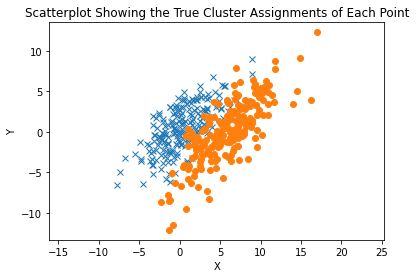

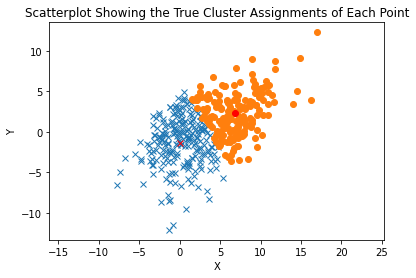

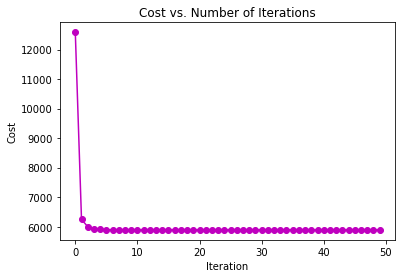

The misclassification error is: 0.272


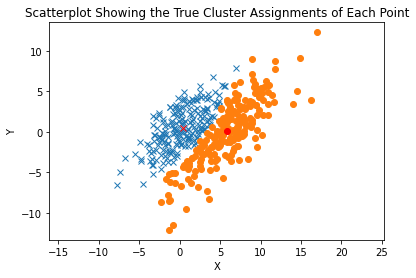

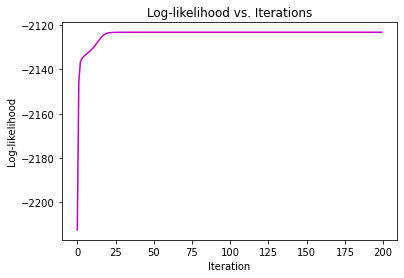

The misclassification error is: 0.105


In [68]:
# TODO: Run this cell to generate the data
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

# TODO: Make a scatterplot for the data points showing the true cluster assignments of each point
# plt.plot(...) # first class, x shape
# plt.plot(...) # second class, circle shape

# extract data points with label 0
point_0 = data[labels==0, :]
# extract data points with label 1
point_1 = data[labels==1, :]

# Make a scatterplot for the data points showing the true cluster assignments of each point
plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# TODO: Run this cell to call the K-means algorithm
N, D = data.shape
K = 2
max_iter = 50

Mu = np.zeros([D, K])
Mu[:, 1] = 1.

# calculate the cost of kmeans algorithm
costs = []
for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    c = cost(data, R, Mu)
    costs.append(c)
    Mu = km_refitting_step(data, R, Mu)

class_1 = R[:, 0]==1
class_2 = R[:, 1]==1

# TODO: Make a scatterplot for the data points showing the K-Means cluster assignments of each point

point_0 = data[class_1, :]
point_1 = data[class_2, :]

plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x')
plt.plot(Mu[0, 0], Mu[1, 0], 'x', color='red') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o')
plt.plot(Mu[0, 1], Mu[1, 1], 'o', color='red') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# plot the cost vs number of iterations
plt.figure()
plt.title('Cost vs. Number of Iterations')
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.plot(np.arange(max_iter), costs, 'mo-')
plt.show()

error = 1 - (np.sum(class_1 & (labels==0)) + np.sum(class_2 & (labels==1))) / N
print('The misclassification error is: %.3f'  % error)

# TODO: Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 

max_iter  = 200

log_likelihoods = []
for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    log_likelihoods.append(log_likelihood(data, Mu, Sigma, Pi))

class_1 = Gamma[:, 0] >= .5
class_2 = Gamma[:, 1] >= .5

# TODO: Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point

point_0 = data[class_1, :]
point_1 = data[class_2, :]

plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x')
plt.plot(Mu[0, 0], Mu[1, 0], 'x', color='red') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o')
plt.plot(Mu[0, 1], Mu[1, 1], 'o', color='red') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# plot the log likelihood vs number of iterations
plt.figure()
plt.title('Log-likelihood vs. Iterations')
plt.ylabel('Log-likelihood')
plt.xlabel('Iteration')
plt.plot(np.arange(max_iter), ll, 'm-')
plt.show()

error = 1 - (np.sum(class_1 & (labels==0)) + np.sum(class_2 & (labels==1))) / N
print('The misclassification error is: %.3f'  % error)

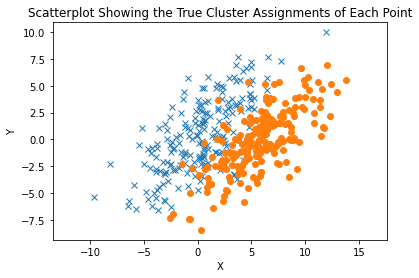

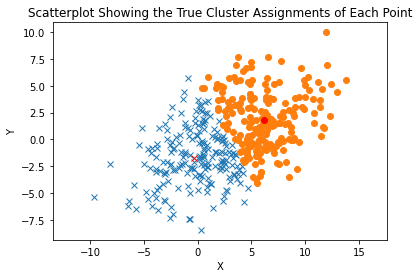

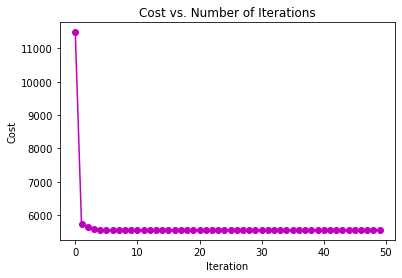

The misclassification error is: 0.265


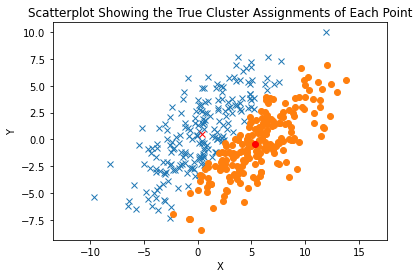

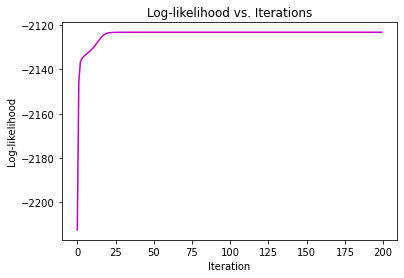

The misclassification error is: 0.090


In [69]:
# TODO: Run this cell to generate the data
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

# TODO: Make a scatterplot for the data points showing the true cluster assignments of each point
# plt.plot(...) # first class, x shape
# plt.plot(...) # second class, circle shape

# extract data points with label 0
point_0 = data[labels==0, :]
# extract data points with label 1
point_1 = data[labels==1, :]

# Make a scatterplot for the data points showing the true cluster assignments of each point
plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# TODO: Run this cell to call the K-means algorithm
N, D = data.shape
K = 2
max_iter = 50

Mu = np.zeros([D, K])
Mu[:, 1] = 1.

# calculate the cost of kmeans algorithm
costs = []
for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    c = cost(data, R, Mu)
    costs.append(c)
    Mu = km_refitting_step(data, R, Mu)

class_1 = R[:, 0]==1
class_2 = R[:, 1]==1

# TODO: Make a scatterplot for the data points showing the K-Means cluster assignments of each point

point_0 = data[class_1, :]
point_1 = data[class_2, :]

plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x')
plt.plot(Mu[0, 0], Mu[1, 0], 'x', color='red') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o')
plt.plot(Mu[0, 1], Mu[1, 1], 'o', color='red') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# plot the cost vs number of iterations
plt.figure()
plt.title('Cost vs. Number of Iterations')
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.plot(np.arange(max_iter), costs, 'mo-')
plt.show()

error = 1 - (np.sum(class_1 & (labels==0)) + np.sum(class_2 & (labels==1))) / N
print('The misclassification error is: %.3f'  % error)

# TODO: Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 

max_iter  = 200

log_likelihoods = []
for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    log_likelihoods.append(log_likelihood(data, Mu, Sigma, Pi))

class_1 = Gamma[:, 0] >= .5
class_2 = Gamma[:, 1] >= .5

# TODO: Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point

point_0 = data[class_1, :]
point_1 = data[class_2, :]

plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x')
plt.plot(Mu[0, 0], Mu[1, 0], 'x', color='red') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o')
plt.plot(Mu[0, 1], Mu[1, 1], 'o', color='red') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# plot the log likelihood vs number of iterations
plt.figure()
plt.title('Log-likelihood vs. Iterations')
plt.ylabel('Log-likelihood')
plt.xlabel('Iteration')
plt.plot(np.arange(max_iter), ll, 'm-')
plt.show()

error = 1 - (np.sum(class_1 & (labels==0)) + np.sum(class_2 & (labels==1))) / N
print('The misclassification error is: %.3f'  % error)

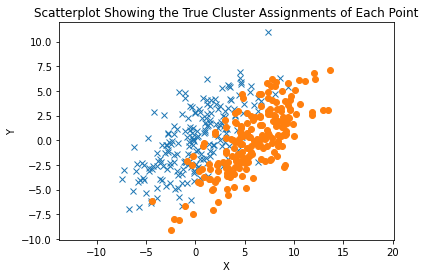

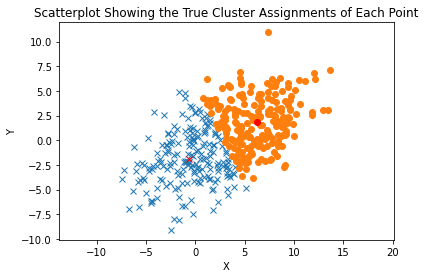

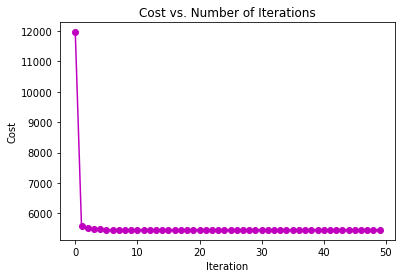

The misclassification error is: 0.265


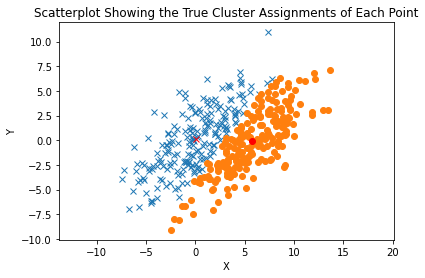

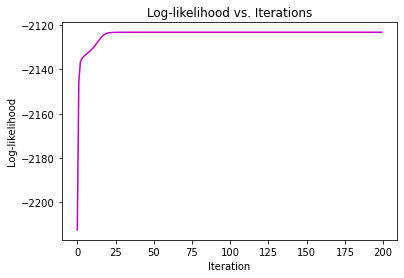

The misclassification error is: 0.113


In [70]:
# TODO: Run this cell to generate the data
num_samples = 400
cov = np.array([[1., .7], [.7, 1.]]) * 10
mean_1 = [.1, .1]
mean_2 = [6., .1]

x_class1 = np.random.multivariate_normal(mean_1, cov, num_samples // 2)
x_class2 = np.random.multivariate_normal(mean_2, cov, num_samples // 2)
xy_class1 = np.column_stack((x_class1, np.zeros(num_samples // 2)))
xy_class2 = np.column_stack((x_class2, np.ones(num_samples // 2)))
data_full = np.row_stack([xy_class1, xy_class2])
np.random.shuffle(data_full)
data = data_full[:, :2]
labels = data_full[:, 2]

# TODO: Make a scatterplot for the data points showing the true cluster assignments of each point
# plt.plot(...) # first class, x shape
# plt.plot(...) # second class, circle shape

# extract data points with label 0
point_0 = data[labels==0, :]
# extract data points with label 1
point_1 = data[labels==1, :]

# Make a scatterplot for the data points showing the true cluster assignments of each point
plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# TODO: Run this cell to call the K-means algorithm
N, D = data.shape
K = 2
max_iter = 50

Mu = np.zeros([D, K])
Mu[:, 1] = 1.

# calculate the cost of kmeans algorithm
costs = []
for it in range(max_iter):
    R = km_assignment_step(data, Mu)
    c = cost(data, R, Mu)
    costs.append(c)
    Mu = km_refitting_step(data, R, Mu)

class_1 = R[:, 0]==1
class_2 = R[:, 1]==1

# TODO: Make a scatterplot for the data points showing the K-Means cluster assignments of each point

point_0 = data[class_1, :]
point_1 = data[class_2, :]

plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x')
plt.plot(Mu[0, 0], Mu[1, 0], 'x', color='red') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o')
plt.plot(Mu[0, 1], Mu[1, 1], 'o', color='red') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# plot the cost vs number of iterations
plt.figure()
plt.title('Cost vs. Number of Iterations')
plt.ylabel('Cost')
plt.xlabel('Iteration')
plt.plot(np.arange(max_iter), costs, 'mo-')
plt.show()

error = 1 - (np.sum(class_1 & (labels==0)) + np.sum(class_2 & (labels==1))) / N
print('The misclassification error is: %.3f'  % error)

# TODO: Run this cell to call the Gaussian Mixture EM algorithm
N, D = data.shape
K = 2
Mu = np.zeros([D, K])
Mu[:, 1] = 1.
Sigma = [np.eye(2), np.eye(2)]
Pi = np.ones(K) / K
Gamma = np.zeros([N, K]) # Gamma is the matrix of responsibilities 

max_iter  = 200

log_likelihoods = []
for it in range(max_iter):
    Gamma = gm_e_step(data, Mu, Sigma, Pi)
    Mu, Sigma, Pi = gm_m_step(data, Gamma)
    log_likelihoods.append(log_likelihood(data, Mu, Sigma, Pi))

class_1 = Gamma[:, 0] >= .5
class_2 = Gamma[:, 1] >= .5

# TODO: Make a scatterplot for the data points showing the Gaussian Mixture cluster assignments of each point

point_0 = data[class_1, :]
point_1 = data[class_2, :]

plt.figure()
plt.plot(point_0[:, 0], point_0[:, 1], 'x')
plt.plot(Mu[0, 0], Mu[1, 0], 'x', color='red') # first class, x shape
plt.plot(point_1[:, 0], point_1[:, 1], 'o')
plt.plot(Mu[0, 1], Mu[1, 1], 'o', color='red') # second class, circle shape
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Scatterplot Showing the True Cluster Assignments of Each Point")
plt.axis('equal')
plt.show()

# plot the log likelihood vs number of iterations
plt.figure()
plt.title('Log-likelihood vs. Iterations')
plt.ylabel('Log-likelihood')
plt.xlabel('Iteration')
plt.plot(np.arange(max_iter), ll, 'm-')
plt.show()

error = 1 - (np.sum(class_1 & (labels==0)) + np.sum(class_2 & (labels==1))) / N
print('The misclassification error is: %.3f'  % error)